In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = np.genfromtxt('data.txt')
data = d[1:len(d[:])][:]

indices = np.loadtxt('pares.txt', dtype=int)

In [3]:
posiciones = data[0:len(data[:]),0:3]
velocidades = data[0:len(data[:]),3:6]
masa = data[0:len(data[:]),6:7]

### Calculo de Distancias 

In [4]:
pos1 = posiciones[indices[:,0]]
pos2 = posiciones[indices[:,1]]

r = pos1 - pos2

In [5]:
r1 = r[:,0]
r2 = r[:,1]
r3 = r[:,2]

R = sqrt(r1**2+r2**2+r3**2)
#np.savetxt('distancia.txt',R)

### Vector Unitario

In [6]:
runi1 = r1/R
runi2 = r2/R
runi3 = r3/R

runi = (runi1,runi2,runi3)
RUNI = transpose(runi)

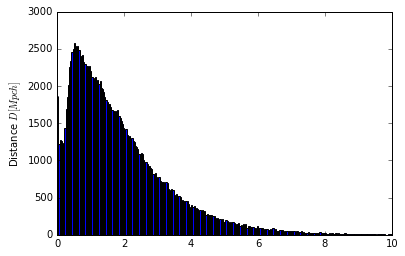

In [7]:
plt.hist(R,bins = 10000)
plt.xlim(0,10)
ylabel(r'Distance $D[Mpch]$')
#xlabel(r'Pares')

### Calculo de Masa

In [8]:
masa1 = masa[indices[:,0]]
masa2 = masa[indices[:,1]]
MasaT = masa1 + masa2

#np.savetxt('MasaTotal.txt',MasaT)

(10, 14)

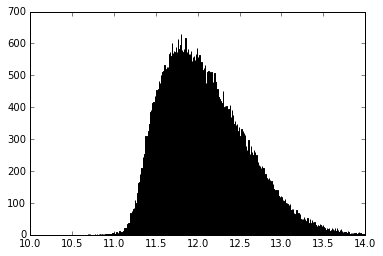

In [9]:
plt.hist(log10(MasaT),bins=1000)
xlim(10,14)

### Calculo de Velocidades Relativas

In [10]:
vel1 = velocidades[indices[:,0]]
vel2 = velocidades[indices[:,1]]

VelR = vel1 - vel2
VelRx = VelR[:,0]
VelRy = VelR[:,1]
VelRz = VelR[:,2]

VelRA = np.sqrt(VelRx**2+VelRy**2+VelRz**2)


#np.savetxt('VelRelaAbs.txt', VelRA)

### Velocidades Paralelas y Perpendiculares

(0, 350)

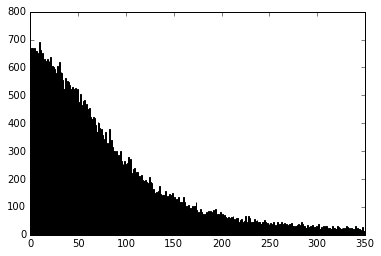

In [11]:
Vparalela = RUNI[:,0]*VelR[:,0] + RUNI[:,1]*VelR[:,1] + RUNI[:,2]*VelR[:,2]
VparalelaVec1 = RUNI[:,0]*Vparalela, RUNI[:,1]*Vparalela, RUNI[:,2]*Vparalela
VparalelaVec = np.transpose(VparalelaVec1)

#np.savetxt('VelParalela.txt',Vparalela)

plt.hist(Vparalela,bins = 10000,color='g')
plt.xlim(0,350)

(0.5, 4)

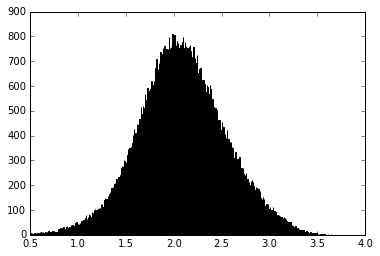

In [12]:
VperpernVec = VelR - VparalelaVec
Vperpendicular = np.sqrt(VperpernVec[:,0]**2+VperpernVec[:,1]**2+VperpernVec[:,2]**2)

#np.savetxt('VelPerpendicular.txt',Vperpendicular)

plt.hist(log10(Vperpendicular),bins = 1000)
plt.xlim(0.5,4)

#### Intento de hallar i para velocidades + y -
```
def findPos(array,elem):
    res = 8008135
    for i in range(len(array)):
        actual = array[i]
        if(actual == elem):
            res = i
    return res

vparaPOS = []
vparaNEG = []
for i in Vparalela:
    if(i>0):
        vparaPOS.append(i)
    else:
        vparaNEG.append(i)


vparaPOSi = []
vparaNEGi = []

for i in vparaPOS:
    b = findPos(Vparalela,i)
    vparaPOSi.append(b)

for i in vparaNEG:
    a = findPos(Vparalela,i)
    vparaNEGi.append(a)
vparaPOSi = Vparalela[Vparalela > 0]

```

#### Optimización de código para hallar i de las velocidades + y -

```
vparaPOS = Vparalela[Vparalela > 0]
vparaNEG = Vparalela[Vparalela < 0]

vparaPOSi = []
vparaNEGi = []

for elem in vparaPOS:
    vparaPOSi.append((Vparalela.tolist()).index(elem))
for i in vparaNEG:
    vparaNEGi.append((Vparalela.tolist()).index(i))

```
#### De aquí obtenemos los indices de las diferentes velocidades paralelas 


#### Realizamos un procedimiento similar para obtener los indices de velocidades paralelas negativas menores a 150 km/s.
```
velparneg_contr = velparneg[velparneg<=-150]
velparneg_contr_i = []
for i in velparneg_contr:
    velparneg_contr_i.append((velpar.tolist()).index(i))
```


#### Obtenemos indices para distancias menores a 2Mpc.
```
Rconst = R[R<=2]
Rconsti = [] 
for i in Rconst:
    Rconsti.append((R.tolist()).index(i))
```

##### Cargamos los datos obtenidos por los paso anteriores:

In [13]:
velpara_restringida_i = loadtxt('velparneg_contr_i.txt')
distancia_restringida_i = loadtxt('Rconsti.txt')


Velpara_restringida_i = np.int_(velpara_restringida_i)
Distancia_restringida_i = np.int_(distancia_restringida_i)

In [14]:
velpara_150neg = Vparalela[Velpara_restringida_i]
dis_velpara_150neg = R[Velpara_restringida_i]
velper_150 = Vperpendicular[Velpara_restringida_i]

### Scatter plot

In [ ]:
plt.figure(figsize=(10,50))
plt.hist2d(velper_150,velpara_150neg, bins=100,cmap='gnuplot');
xlim(0,4)
#colorbar()
savefig('Prueba2.png')

In [ ]:
plot(dis_velpara_150neg,velpara_150neg,'o',color='r',ms = 3,label='Distancia y Velocidad Paralela')
xLine = zeros(400)
x = linspace(0,100)
y = -70*x
plot(xLine)
plot(x,y)
scatter(0,0,color='k',s=100)
xlim(-1.5,20)
ylim(-160,50)
legend(loc='best',frameon=False)

In [ ]:
plt.figure(figsize=(10,50))
plt.hist2d(dis_velpara_150neg,velpara_150neg, bins=100,cmap='gnuplot');
xlim(0,4)
#colorbar()
savefig('Prueba.png')
